In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_flat = X_train.reshape(-1, 28*28) / 255
X_test_flat = X_test.reshape(-1, 28*28) / 255

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_flat)

In [16]:
X_train_pca = pca_2d.fit_transform(X_train_flat)
X_train_pca_inv = pca_2d.inverse_transform(X_train_pca)

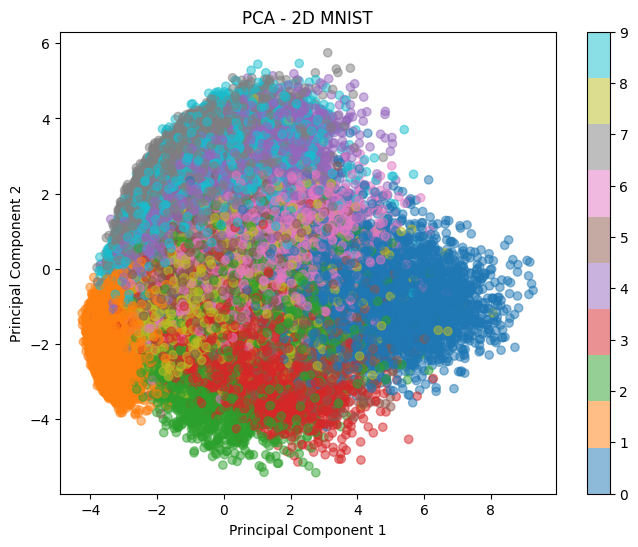

In [4]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='tab10', alpha=0.5)
plt.colorbar(scatter, ticks=range(10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D MNIST')
plt.show()

In [5]:
for n_components in [2, 10, 50]:
    pca = PCA(n_components=n_components)
    pca.fit(X_train_flat)
    variance_retained = np.sum(pca.explained_variance_ratio_)
    print(f"Variance retained with {n_components} components: {variance_retained:.2f}")

Variance retained with 2 components: 0.17
Variance retained with 10 components: 0.49
Variance retained with 50 components: 0.82


In [6]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [7]:
input_dim = 784
encoding_dim = 2

input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

decoded = Dense(64, activation='relu')(encoder_output)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

In [9]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoder_output)

autoencoder.compile(optimizer='RMSprop', loss='binary_crossentropy')
autoencoder.fit(X_train_flat, X_train_flat, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test_flat, X_test_flat))

Epoch 1/50
235/235 [==============================] - 3s 6ms/step - loss: 0.1746 - val_loss: 0.1790
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1743 - val_loss: 0.1787
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1742 - val_loss: 0.1798
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1741 - val_loss: 0.1782
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1739 - val_loss: 0.1779
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1738 - val_loss: 0.1788
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1737 - val_loss: 0.1786
Epoch 8/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1737 - val_loss: 0.1790
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1736 - val_loss: 0.1778
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1735 - val_loss: 0.1786

1875/1875 [==============================] - 3s 2ms/step


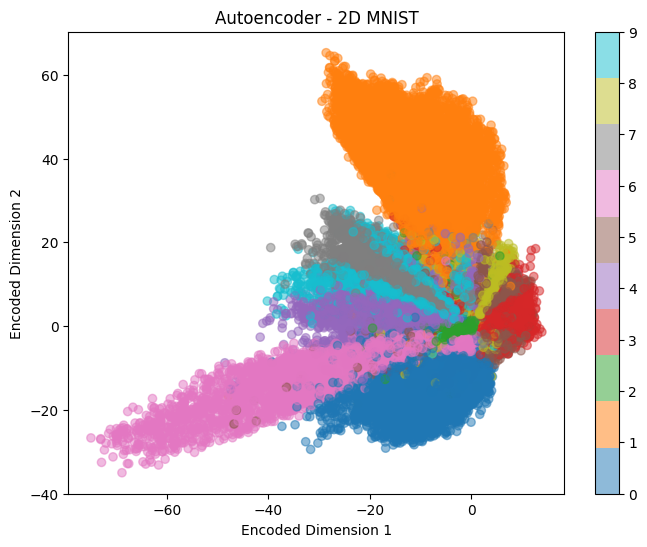

In [10]:
encoded_imgs = encoder.predict(X_train_flat)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_train, cmap='tab10', alpha=0.5)
plt.colorbar(scatter, ticks=range(10))
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.title('Autoencoder - 2D MNIST')
plt.show()

In [14]:
decoded_imgs = autoencoder.predict(X_train_flat)

1875/1875 [==============================] - 4s 2ms/step


In [12]:
from sklearn.metrics import mean_squared_error

In [17]:
pca_reconstruction_error = mean_squared_error(X_train_flat, X_train_pca_inv)
autoencoder_reconstruction_error = mean_squared_error(X_train_flat, decoded_imgs)

print(f'PCA Reconstruction Error: {pca_reconstruction_error}')
print(f'Autoencoder Reconstruction Error: {autoencoder_reconstruction_error}')

PCA Reconstruction Error: 0.0559527031860046
Autoencoder Reconstruction Error: 0.036919643446825204
